In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 2 main datatypes
series = pd.Series(["BMW", "Toyota", "Honda", "Nissan"])

In [3]:
#series=1 dimensional
#dataframe=2 dimensional
series

0       BMW
1    Toyota
2     Honda
3    Nissan
dtype: object

In [4]:
car_sales = pd.read_csv("car-sales.csv")

In [5]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


![](path/to/pandas-anatomy-of-a-dataframe.png)

Describe data

In [6]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

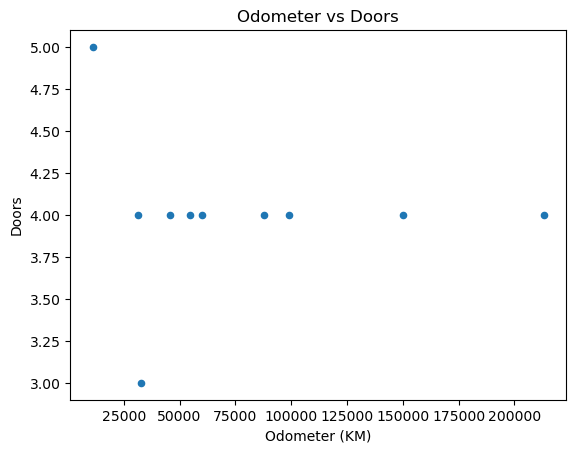

In [7]:
car_sales.plot(kind='scatter', x='Odometer (KM)', y='Doors')
plt.title('Odometer vs Doors')
plt.xlabel('Odometer (KM)')
plt.ylabel('Doors')
plt.show()


In [8]:
pd.crosstab(car_sales.Make, car_sales.Doors)

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [9]:
car_sales['Price'] = car_sales['Price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

In [10]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


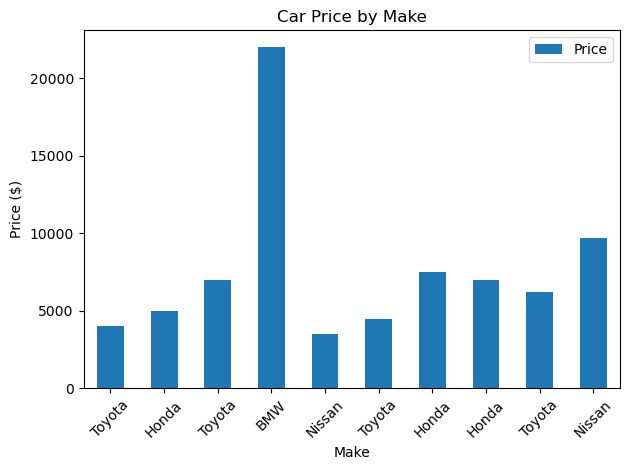

In [11]:
car_sales.plot(x='Make', y='Price', kind='bar')
plt.title('Car Price by Make')
plt.xlabel('Make')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [15]:
# Fill numeric columns with mean or median
car_sales_missing['Odometer'] = car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean())



In [16]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [17]:
car_sales_missing['Doors'] = car_sales_missing['Doors'].fillna(car_sales_missing['Doors'].mode()[0])

In [18]:
car_sales_missing['Make'] = car_sales_missing['Make'].fillna('Unknown')
car_sales_missing['Colour'] = car_sales_missing['Colour'].fillna('Unknown')

In [21]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,Unknown,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,Unknown
8,Toyota,White,60000.000000,4.0,Unknown
9,Unknown,White,31600.000000,4.0,"$9,700"


In [20]:
car_sales_missing['Price'] = car_sales_missing['Price'].fillna('Unknown')

In [22]:
import pandas as pd

# Define 5 new rows as dictionaries
new_rows = [
    {"Make": "Ford", "Colour": "Silver", "Odometer": 54000, "Doors": 4.0, "Price": 8500},
    {"Make": "Mazda", "Colour": "Red", "Odometer": 72000, "Doors": 4.0, "Price": 6900},
    {"Make": "Tesla", "Colour": "Black", "Odometer": 15000, "Doors": 4.0, "Price": 45000},
    {"Make": "Hyundai", "Colour": "Blue", "Odometer": 88000, "Doors": 4.0, "Price": 7600},
    {"Make": "Chevrolet", "Colour": "White", "Odometer": 132000, "Doors": 2.0, "Price": 4300},
]

# Convert to DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append to the original DataFrame
car_sales_missing = pd.concat([car_sales_missing, new_rows_df], ignore_index=True)

# View the updated DataFrame
print(car_sales_missing.tail(10))  # Show last 10 rows


         Make   Colour       Odometer  Doors    Price
5      Toyota    Green   92302.666667    4.0   $4,500
6       Honda  Unknown   92302.666667    4.0   $7,500
7       Honda     Blue   92302.666667    4.0  Unknown
8      Toyota    White   60000.000000    4.0  Unknown
9     Unknown    White   31600.000000    4.0   $9,700
10       Ford   Silver   54000.000000    4.0     8500
11      Mazda      Red   72000.000000    4.0     6900
12      Tesla    Black   15000.000000    4.0    45000
13    Hyundai     Blue   88000.000000    4.0     7600
14  Chevrolet    White  132000.000000    2.0     4300


In [23]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,Unknown,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,Unknown
8,Toyota,White,60000.000000,4.0,Unknown
9,Unknown,White,31600.000000,4.0,"$9,700"


In [26]:
import numpy as np

# Replace 'Unknown' with NaN
car_sales_missing['Price'] = car_sales_missing['Price'].replace('Unknown', np.nan)

# Remove dollar signs and commas
car_sales_missing['Price'] = car_sales_missing['Price'].replace(r'[\$,]', '', regex=True)

# Convert to float
car_sales_missing['Price'] = car_sales_missing['Price'].astype(float)

# View cleaned data
print(car_sales_missing)


         Make   Colour       Odometer  Doors    Price
0      Toyota    White  150043.000000    4.0   4000.0
1       Honda      Red   87899.000000    4.0   5000.0
2      Toyota     Blue   92302.666667    3.0   7000.0
3         BMW    Black   11179.000000    5.0  22000.0
4      Nissan    White  213095.000000    4.0   3500.0
5      Toyota    Green   92302.666667    4.0   4500.0
6       Honda  Unknown   92302.666667    4.0   7500.0
7       Honda     Blue   92302.666667    4.0      NaN
8      Toyota    White   60000.000000    4.0      NaN
9     Unknown    White   31600.000000    4.0   9700.0
10       Ford   Silver   54000.000000    4.0   8500.0
11      Mazda      Red   72000.000000    4.0   6900.0
12      Tesla    Black   15000.000000    4.0  45000.0
13    Hyundai     Blue   88000.000000    4.0   7600.0
14  Chevrolet    White  132000.000000    2.0   4300.0


In [27]:
import numpy as np

car_sales_missing['Price'] = car_sales_missing['Price'].replace('Unknown', np.nan)
car_sales_missing['Price'] = car_sales_missing['Price'].replace(r'[\$,]', '', regex=True)
car_sales_missing['Price'] = car_sales_missing['Price'].astype(float)

In [28]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,4000.0
1,Honda,Red,87899.000000,4.0,5000.0
2,Toyota,Blue,92302.666667,3.0,7000.0
3,BMW,Black,11179.000000,5.0,22000.0
4,Nissan,White,213095.000000,4.0,3500.0
5,Toyota,Green,92302.666667,4.0,4500.0
6,Honda,Unknown,92302.666667,4.0,7500.0
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,4.0,NaN
9,Unknown,White,31600.000000,4.0,9700.0


In [29]:
import numpy as np

# Set a random seed for consistent results (optional)
np.random.seed(42)

# Add a new column with random years between 2005 and 2021
car_sales_missing['Year'] = np.random.randint(2005, 2022, size=len(car_sales_missing))

# View the updated DataFrame
print(car_sales_missing)


         Make   Colour       Odometer  Doors    Price  Year
0      Toyota    White  150043.000000    4.0   4000.0  2011
1       Honda      Red   87899.000000    4.0   5000.0  2019
2      Toyota     Blue   92302.666667    3.0   7000.0  2015
3         BMW    Black   11179.000000    5.0  22000.0  2012
4      Nissan    White  213095.000000    4.0   3500.0  2011
5      Toyota    Green   92302.666667    4.0   4500.0  2015
6       Honda  Unknown   92302.666667    4.0   7500.0  2015
7       Honda     Blue   92302.666667    4.0      NaN  2008
8      Toyota    White   60000.000000    4.0      NaN  2012
9     Unknown    White   31600.000000    4.0   9700.0  2007
10       Ford   Silver   54000.000000    4.0   8500.0  2006
11      Mazda      Red   72000.000000    4.0   6900.0  2016
12      Tesla    Black   15000.000000    4.0  45000.0  2010
13    Hyundai     Blue   88000.000000    4.0   7600.0  2006
14  Chevrolet    White  132000.000000    2.0   4300.0  2005
